<a href="https://colab.research.google.com/github/Maicken052/MACC/blob/main/Caso_de_Estudio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Caso de Estudio:***
## Aprendizaje automático de máquina - Universidad del Rosario
### Samuel Fernando De Dios Pérez <br> Robert Daniel Fonseca Lesmez <br> Escuela de Ingeniería, Ciencia y Tecnología

## **Librerias a usar**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import StandardScaler #preprosesamiento de datos
from sklearn.model_selection import train_test_split #entrenar los datos
from sklearn.linear_model import LinearRegression #hacer la regresion
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix, accuracy_score, classification_report, r2_score #usar las metricas de errores, para verificar que los datos estan bien
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_text, plot_tree
from sklearn.neighbors import KNeighborsClassifier, kneighbors_graph
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import roc_curve, auc
from sklearn.manifold import TSNE
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

## **Importar el dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_ori=pd.read_csv('/content/drive/MyDrive/Uni/maquinas 2024-1/caso_estudio/SAHeart.csv')
data=data_ori.copy()

## **Preprocesamiento de los datos**




Tenemos la siguiente descripción de las variables:

*   ***sbp:*** Presión Arterial Sistólica, Es la presión máxima ejercida en las arterias durante los latidos del corazón. Esta medida es crucial para evaluar la salud cardiovascular, ya que niveles altos pueden indicar un mayor riesgo de enfermedades cardíacas y otros problemas de salud.
*   ***tobacco:*** Esta variable representa la cantidad acumulada de tabaco consumida, medida en kilogramos. El tabaquismo está fuertemente asociado con enfermedades cardíacas y una variedad de otros problemas de salud, por lo que esta medida puede ser importante para evaluar el riesgo cardiovascular.
*   ***ldl:*** El LDL es conocido comúnmente como el "colesterol malo". Niveles elevados de LDL en la sangre pueden aumentar el riesgo de enfermedades cardíacas al contribuir al depósito de placa en las arterias.
*   ***adiposity:*** Esta variable representa la presencia de sobrepeso severo, que puede ser un factor de riesgo importante para una variedad de problemas de salud, incluyendo enfermedades cardíacas, diabetes y problemas articulares.
*   ***famhist:***  Indica si hay antecedentes familiares de enfermedades cardíacas, lo cual puede aumentar el riesgo individual de desarrollar enfermedades cardiovasculares.
*   ***typea:*** Se refiere a un tipo de comportamiento caracterizado por la impaciencia, la competitividad y la tendencia a experimentar estrés de manera constante. Este tipo de comportamiento ha sido asociado con un mayor riesgo de enfermedades cardíacas.
*   ***obesity:*** Esta variable representa la acumulación excesiva de grasa en el cuerpo, lo cual puede contribuir a una variedad de problemas de salud, incluyendo enfermedades cardíacas, diabetes tipo 2 y ciertos tipos de cáncer.
*   ***alcohol:*** Indica la cantidad y frecuencia de consumo de alcohol en el momento del estudio. El consumo excesivo de alcohol puede tener efectos negativos en la salud cardiovascular y general.
*   ***age:*** La edad en la que los participantes del estudio fueron evaluados por primera vez. La edad es un factor importante a considerar en la evaluación del riesgo cardiovascular, ya que el riesgo tiende a aumentar con la edad.
*   ***chd:*** Esta variable representa la presencia o ausencia de enfermedad coronaria, una condición en la que las arterias que suministran sangre al corazón están obstruidas o dañadas, lo que puede llevar a ataques cardíacos y otros problemas cardíacos graves.


In [ ]:
print(data.isnull().sum(), '\n') #Revisar la cantidad de datos nulos

row.names    0
sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64 



Como no hay datos nulos, dejamos las filas como están

In [ ]:
data.info() #Información de las columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  462 non-null    int64  
 1   sbp        462 non-null    int64  
 2   tobacco    462 non-null    float64
 3   ldl        462 non-null    float64
 4   adiposity  462 non-null    float64
 5   famhist    462 non-null    object 
 6   typea      462 non-null    int64  
 7   obesity    462 non-null    float64
 8   alcohol    462 non-null    float64
 9   age        462 non-null    int64  
 10  chd        462 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB


In [ ]:
print(f'Número de filas: {data.shape[0]}, Número de columnas: {data.shape[1]}') #Número de filas y columnas
data.head() #Visualización del dataset

Número de filas: 462, Número de columnas: 11


,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


Tenemos una baja cantidad de filas, así que podemos sospechar que habrán problemas a la hora de entrenar el modelo (sesgos en la cantidad de positivos o negativos)

In [ ]:
print(data.nunique()) #Diferentes tipos de valores por columna

row.names    462
sbp           62
tobacco      214
ldl          329
adiposity    408
famhist        2
typea         54
obesity      400
alcohol      249
age           49
chd            2
dtype: int64


Se procede a eliminar el nombre de la fila dado que es innecesario para el modelo

In [ ]:
data = data.drop(['row.names'], axis=1)

Además, se cambia el tipo de variable de famhist, de categórica a numérica, por medio de 1's y 0's, 1 si está presente y 0 si es ausente.

In [ ]:
data['famhist'] = data['famhist'].replace({'Present': 1, 'Absent': 0})

In [ ]:
data.describe() #Ver la información completa del dataset

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,0.415584,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,0.493357,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,0.000000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,0.000000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,0.000000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,1.000000,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,1.000000,78.000000,46.580000,147.190000,64.000000,1.000000


In [ ]:
#Tipos de datos
categorical_data = data.select_dtypes(include=object)
print(categorical_data.columns)
numeric_data = data.select_dtypes(include=np.number)
print(numeric_data.columns)

Index([], dtype='object')
Index(['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity',
       'alcohol', 'age', 'chd'],
      dtype='object')


Con el cambio realizado anteriormente, podemos observar que todas las variables terminan siendo numéricas, por lo que sirven para entrenar el modelo.

## **Insights**

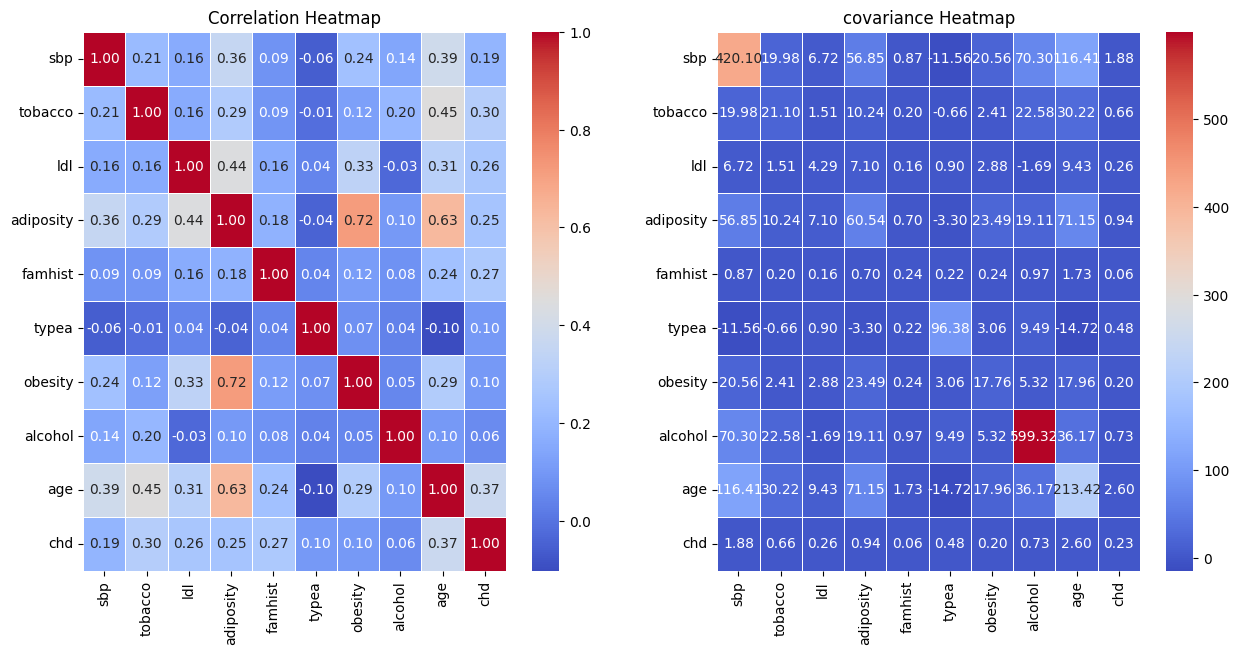

In [ ]:
#Visualización de la matriz de correlación
correlation_matrix = data.corr()
cov_matrix = data.cov()
plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')

plt.subplot(1,2,2)
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('covariance Heatmap')
plt.show()

Como la adiposidad y la obesidad están muy relacionadas, entonces se eliminará una de las dos con el fin de quitar carga al modelo a la hora de entrenarlo.

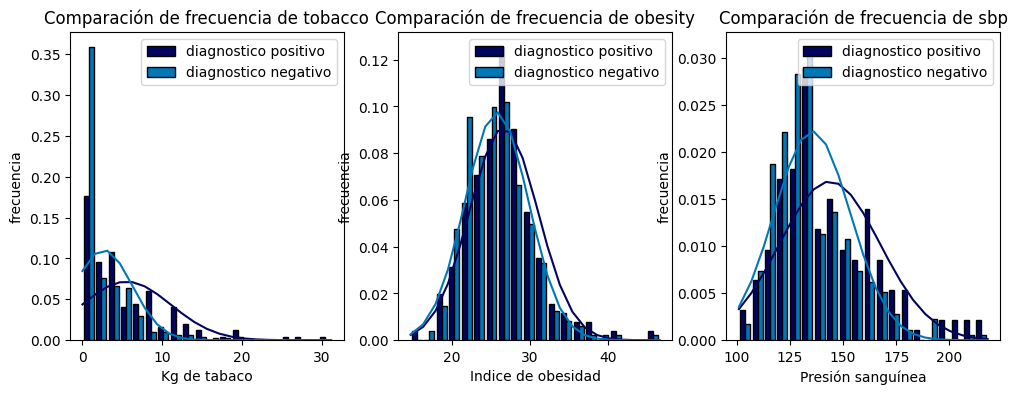

In [ ]:
#Comparar la frecuencia de número de reviews comparando si el host tiene su perfil verificado o no
plt.figure(figsize=(12, 4))

vari=['tobacco', 'obesity', 'sbp']
ti  =['Kg de tabaco', 'Indice de obesidad', 'Presión sanguínea']

for num, i in enumerate(vari):
  plt.subplot(1, len(vari), num+1)
  x=[data[data['chd']==1][i], data[data['chd']==0][i]]
  n, bins, patches=plt.hist(x, bins=20, density = True, histtype = "bar", color=["#03045e", "#0077b6"], edgecolor = 'Black', label=['diagnostico positivo','diagnostico negativo'])
  plt.legend(prop={'size': 10})
  sigma1 = x[0].std()
  mu1    = x[0].mean()

  y1 = ((1 / (np.sqrt(2 * np.pi) * sigma1)) *
      np.exp(-0.5 * (1 / sigma1 * (bins - mu1))**2))
  plt.plot(bins, y1, '-', color="#03045e")

  sigma2 = x[1].std()
  mu2    = x[1].mean()

  y2 = ((1 / (np.sqrt(2 * np.pi) * sigma2)) *
      np.exp(-0.5 * (1 / sigma2 * (bins - mu2))**2))
  plt.plot(bins, y2, '-', color="#0077b6")

  plt.title(f'Comparación de frecuencia de {i}')
  plt.ylabel('frecuencia')
  plt.xlabel(f'{ti[num]}')


plt.show()

se ve que las gráficas tienen distribuciones entre exponenciales y normales

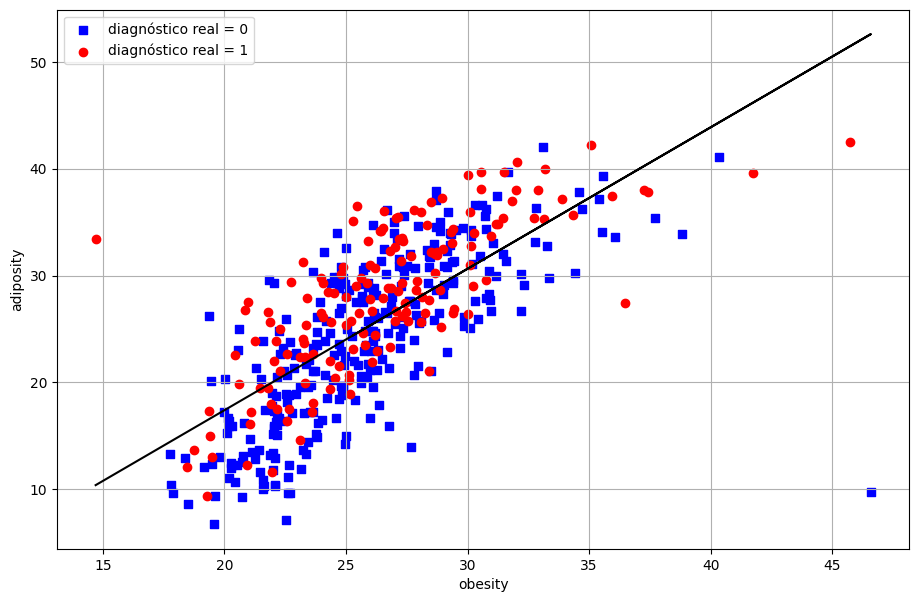

In [ ]:
from scipy.stats import linregress

plt.figure(figsize=(11,7))

slope, intercept, _, _, _ = linregress(data['obesity'], data['adiposity'])

plt.scatter(data[data['chd'] == 0]['obesity'], data[data['chd'] == 0]['adiposity'], c='b', marker='s', label='diagnóstico real = 0')
plt.scatter(data[data['chd'] == 1]['obesity'], data[data['chd'] == 1]['adiposity'], c='r', marker='o', label='diagnóstico real = 1')

plt.plot(data['obesity'], slope*data['obesity'] + intercept, color='black')

plt.legend()
plt.grid(True)
plt.ylabel('adiposity')
plt.xlabel('obesity')

plt.show()

acá podemos ver gráficamente que estas dos variables están muy relacionadas, por lo que da más motivo para eliminar una de ellas.

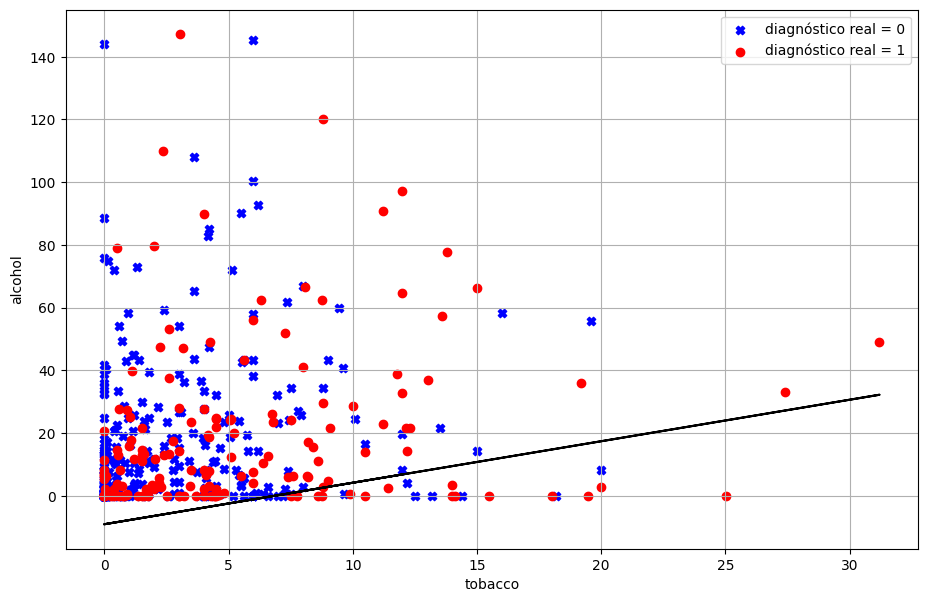

In [ ]:
from scipy.stats import linregress

plt.figure(figsize=(11,7))

slope, intercept, _, _, _ = linregress(data['obesity'], data['adiposity'])

plt.scatter(data[data['chd'] == 0]['tobacco'], data[data['chd'] == 0]['alcohol'], c='b', marker='X', label='diagnóstico real = 0')
plt.scatter(data[data['chd'] == 1]['tobacco'], data[data['chd'] == 1]['alcohol'], c='r', marker='o', label='diagnóstico real = 1')

plt.plot(data['tobacco'], slope*data['tobacco'] + intercept, color='black')

plt.legend()
plt.grid(True)
plt.ylabel('alcohol')
plt.xlabel('tobacco')

plt.show()

Vemos que no hay tanta relación entre la gente de consume tabaco y que al tiempo consuma alcohol.

## **Modelos de clasificación**

Previo al uso de cualquier modelo, dividimos los datos en train y test con su debida estandarización, además, quitamos la adiposidad dado que está muy relacionada con la obesidad, y lo mejor es no repetir información para no sesgar el modelo.

In [ ]:
X = data.drop(['chd', 'adiposity'],axis=1)
y = data['chd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=911)
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:
print(X_train.shape, X_test.shape)

(369, 8) (93, 8)


###**Arbol de clasificación**

previo a la creación del modelo final, veamos cuál es la mejor profundidad y el mejor criterio, sumado a la mejor división para cada criterio.

In [ ]:
criterions = ['gini', 'log_loss', 'entropy']
s = ['best', 'random']

#Usar diferentes profundidades para cada criterio y splitter para ver cuál es más preciso
for sp in s:
  for i in range(2, 20, 2):
    for c in criterions:
      tree_ = DecisionTreeClassifier(max_depth=i, criterion=c, splitter=sp, min_samples_split=8)
      tree_.fit(X_train_sc,y_train)
      y_pred_tree = tree_.predict(X_test_sc)
      ac = accuracy_score(y_test,y_pred_tree)
      if ac > 0.68:
        print(f'La profundidad es: {i}, el criterio es: {c} y decisiones: {sp}')
        print(f'La precisión del modelo es: {ac}\n')

La profundidad es: 6, el criterio es: log_loss y decisiones: best
La precisión del modelo es: 0.7096774193548387

La profundidad es: 6, el criterio es: entropy y decisiones: best
La precisión del modelo es: 0.7096774193548387

La profundidad es: 10, el criterio es: entropy y decisiones: random
La precisión del modelo es: 0.6989247311827957



Después del análisis, ponemos la mejor profundidad y el mejor criterio. En este caso, dado que la división al azar fluctua mucho entre 0.50 y 0.75, decidimos dejar el splitter "best", junto con profundidad 6 y criterio "entropy". Para el mínimo número de muestras al momento de dividirse dejamos 8 según lo que obtenido en la prueba, con el fin de mejorar la exactitud del modelo.

**Creación del modelo**

In [ ]:
tree = DecisionTreeClassifier(max_depth=6, criterion='entropy', splitter='best', min_samples_split=8)
tree.fit(X_train_sc,y_train)
y_pred_tree = tree.predict(X_test_sc)

**Reporte y métricas**

In [ ]:
print(f'los diagnosticos predecidos son:\n {y_pred_tree}\n')
print(f'La exactitud del modelo es: {accuracy_score(y_test, y_pred_tree)}\n')
print(f'La matriz de confusión es:\n {confusion_matrix(y_test,y_pred_tree)}\n')
print("Classification Report:\n", classification_report(y_test, y_pred_tree))

los diagnosticos predecidos son:
 [0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1
 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1]

La exactitud del modelo es: 0.7096774193548387

La matriz de confusión es:
 [[51  8]
 [19 15]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.86      0.79        59
           1       0.65      0.44      0.53        34

    accuracy                           0.71        93
   macro avg       0.69      0.65      0.66        93
weighted avg       0.70      0.71      0.69        93



Tenemos dos maneras distintas de visualizar el árbol obtenido:

*Forma de texto:*

In [ ]:
print(export_text(tree, feature_names=['sbp', 'tobacco', 'ldl', 'famhist', 'typea', 'obesity',
       'alcohol', 'age']))

|--- age <= 0.44
|   |--- age <= -0.86
|   |   |--- obesity <= -1.13
|   |   |   |--- tobacco <= -0.30
|   |   |   |   |--- ldl <= -1.15
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- ldl >  -1.15
|   |   |   |   |   |--- class: 0
|   |   |   |--- tobacco >  -0.30
|   |   |   |   |--- class: 1
|   |   |--- obesity >  -1.13
|   |   |   |--- class: 0
|   |--- age >  -0.86
|   |   |--- typea <= 1.60
|   |   |   |--- tobacco <= 0.92
|   |   |   |   |--- obesity <= -0.09
|   |   |   |   |   |--- sbp <= 0.79
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- sbp >  0.79
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- obesity >  -0.09
|   |   |   |   |   |--- ldl <= -0.25
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- ldl >  -0.25
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- tobacco >  0.92
|   |   |   |   |--- typea <= 0.62
|   |   |   |   |   |--- typea <= -0.91
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- typea >  -

Forma Gráfica

<class 'list'>


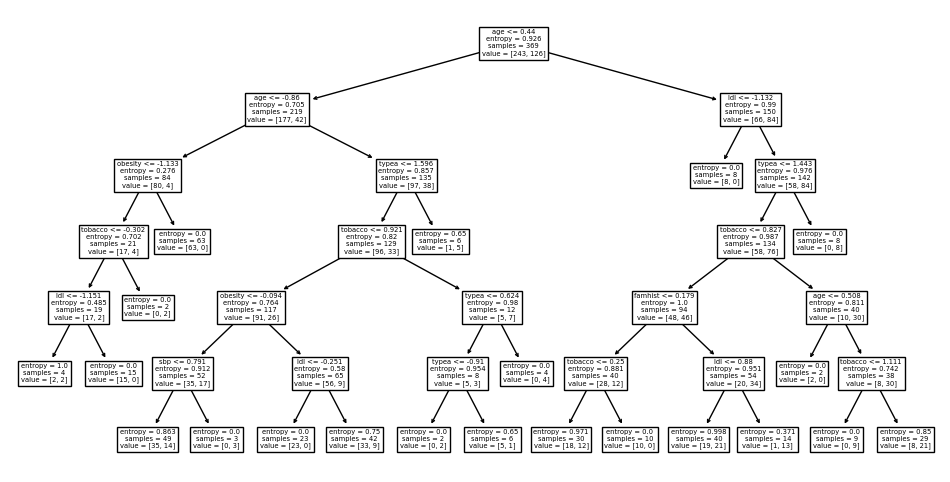

In [ ]:
plt.figure(figsize=(12,6))
tg = plot_tree(tree, feature_names=['sbp', 'tobacco', 'ldl', 'famhist', 'typea', 'obesity', 'alcohol', 'age'])
print(type(tg))

###**KNN**

Previo a la creación del modelo final, veamos cuál es el mejor número de vecinos usando vecinos con peso. El peso a asignar será la distancia que tenga con cada vecino (si es menos distancia, menos peso, y si es más distancia, más peso)

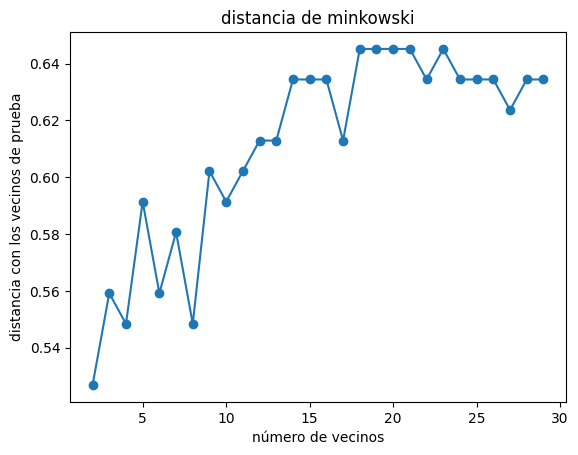

In [ ]:
dist = []

for i in range(2, 30):
  kn_prueba = KNeighborsClassifier(n_neighbors=i, weights='distance')
  kn_prueba.fit(X_train, y_train)
  dist.append(kn_prueba.score(X_test, y_test))

plt.plot(range(2,30), dist, marker='o')
plt.title('distancia de minkowski')
plt.xlabel('número de vecinos')
plt.ylabel('distancia con los vecinos de prueba')
plt.show()

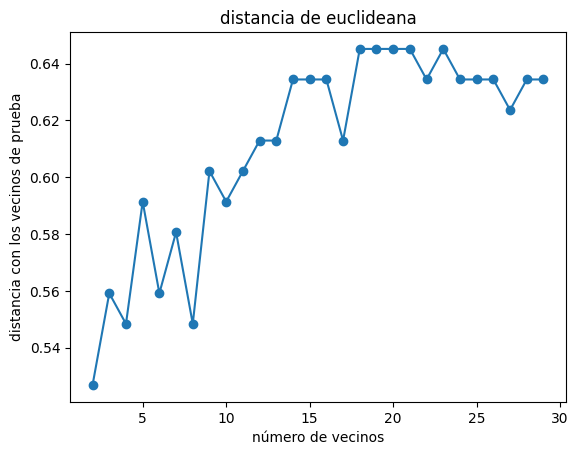

In [ ]:
dist = []

for i in range(2, 30):
  kn_prueba = KNeighborsClassifier(n_neighbors=i, weights='distance', metric='euclidean')
  kn_prueba.fit(X_train, y_train)
  dist.append(kn_prueba.score(X_test, y_test))

plt.plot(range(2,30), dist, marker='o')
plt.title('distancia de euclideana')
plt.xlabel('número de vecinos')
plt.ylabel('distancia con los vecinos de prueba')
plt.show()

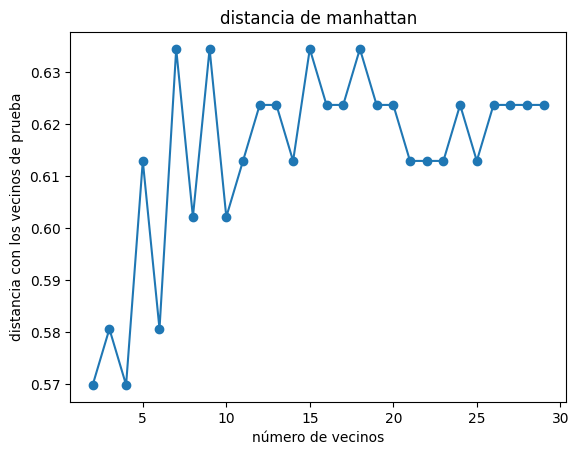

In [ ]:
dist = []

for i in range(2, 30):
  kn_prueba = KNeighborsClassifier(n_neighbors=i, weights='distance', metric='manhattan')
  kn_prueba.fit(X_train, y_train)
  dist.append(kn_prueba.score(X_test, y_test))

plt.plot(range(2,30), dist, marker='o')
plt.title('distancia de manhattan')
plt.xlabel('número de vecinos')
plt.ylabel('distancia con los vecinos de prueba')
plt.show()

Vemos que uno de los intervalos con mejor número de vecinos está entre 18 y 21, así que usamos uno de estos, en este caso, 19, para evitar el uso de vecinos impares. Se usan distintas métricas de distancia con el fin de saber cuál nos da mejores resultados, pero en general podemos obtener la misma exactitud máxima con cualquiera, por lo que dejamos la default, es decir, minkowski.

**Creación del modelo**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=19, weights='distance')
knn.fit(X_train_sc, y_train)
y_pred_knn = knn.predict(X_test_sc)

**Reporte y métricas**

In [ ]:
print(f'los diagnosticos predecidos son:\n {y_pred_knn}\n')
print(f'La precisión del modelo es: {accuracy_score(y_test,y_pred_knn)}\n')
print(f'La matriz de confusión es:\n {confusion_matrix(y_test,y_pred_knn)}\n')
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

los diagnosticos predecidos son:
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1]

La precisión del modelo es: 0.6666666666666666

La matriz de confusión es:
 [[55  4]
 [27  7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.93      0.78        59
           1       0.64      0.21      0.31        34

    accuracy                           0.67        93
   macro avg       0.65      0.57      0.55        93
weighted avg       0.66      0.67      0.61        93



###**Naive Bayes**

**Creación del modelo**

In [ ]:
naive = GaussianNB()
naive.fit(X_train_sc, y_train)
y_pred_naive = naive.predict(X_test_sc)

**Reporte y métricas**

In [ ]:
print(f'los diagnosticos predecidos son:\n {y_pred_naive}\n')
print(f'La precisión del modelo es: {accuracy_score(y_test,y_pred_naive)}\n')
print(f'La matriz de confusión es:\n {confusion_matrix(y_test,y_pred_naive)}\n')
print("Classification Report:\n", classification_report(y_test, y_pred_naive))

los diagnosticos predecidos son:
 [0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1
 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1]

La precisión del modelo es: 0.6559139784946236

La matriz de confusión es:
 [[48 11]
 [21 13]]

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.81      0.75        59
           1       0.54      0.38      0.45        34

    accuracy                           0.66        93
   macro avg       0.62      0.60      0.60        93
weighted avg       0.64      0.66      0.64        93



###**Graficas de verificación y comparación de los resultados y el modelo**

**Matriz de confusión**



*   Verdadero Positivo (TP): Los casos que el modelo ha clasificado correctamente como positivos.
*   Falso Negativo (FN): Los casos positivos que el modelo ha clasificado incorrectamente como negativos.
*   Falso Positivo (FP): Los casos negativos que el modelo ha clasificado incorrectamente como positivos.
*   Verdadero Negativo (TN): Los casos que el modelo ha clasificado correctamente como negativos.

Se desea que los TP y TN sean los más altos.

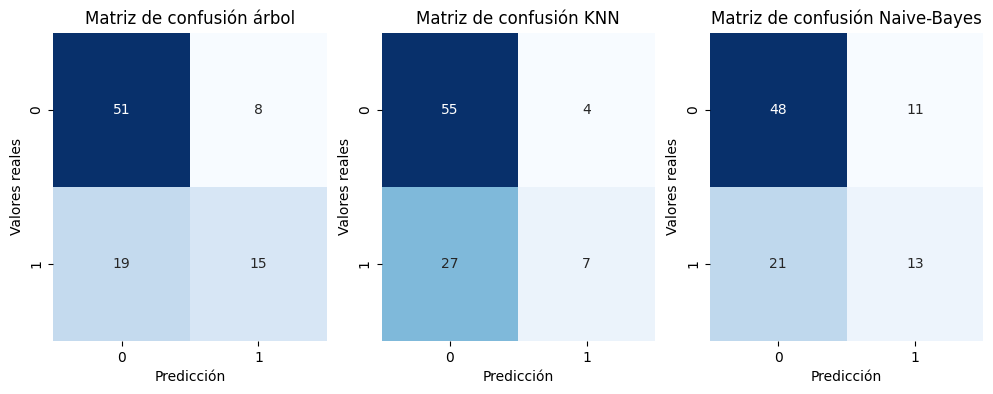

In [ ]:
plt.figure(figsize=(12, 4))

#primera grafica
plt.subplot(1, 3, 1)
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_tree)

# Crear el gráfico de la matriz de confusión
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión árbol')


#segunda grafica
plt.subplot(1, 3, 2)
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_knn)

# Crear el gráfico de la matriz de confusión
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión KNN')


#tercera grafica
plt.subplot(1, 3, 3)
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_naive)

# Crear el gráfico de la matriz de confusión
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión Naive-Bayes')



plt.show()

**Curva ROC**

La curva ROC representa la tasa de verdaderos positivos en el eje y y la tasa de falsos positivos en el eje x para diferentes umbrales de clasificación.

Nos dice que tan bueno es el modelo para distinguir entre dos clases.

* Sensibilidad (recall): Proporción de identificados correctamente con 1. $$sensibilidad=\frac{TP}{TP+FN}$$
* Especificidad: Proporción de identificados correctamente con 0. $$especificidad=\frac{TN}{TN+FP}$$

La curva ROC es la gráfica que relaciona 1-especificidad y la sensibilidad.

$AUC$ es el área bajo la curva ROC y nos dice el porcentaje para distinguir entre clases. Nunca se debe de aproximar a $0.5$.

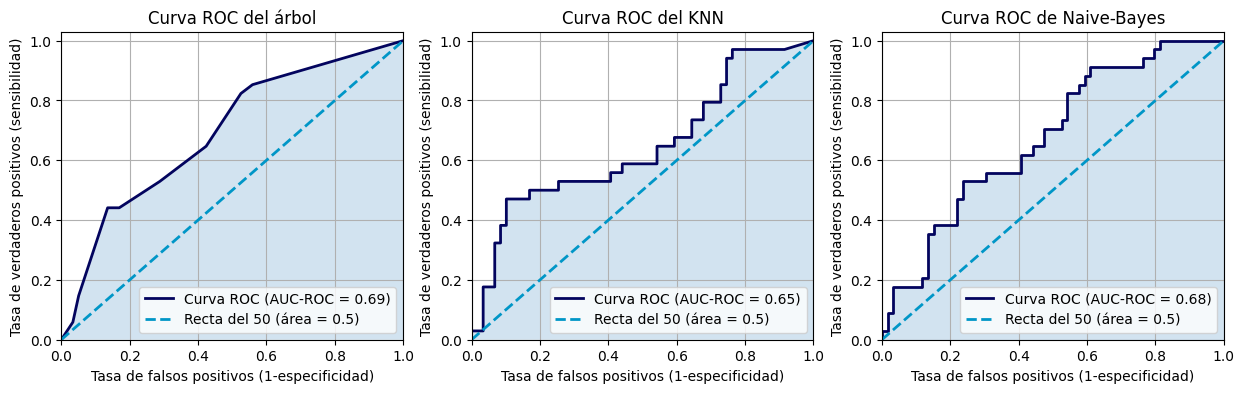

In [ ]:
plt.figure(figsize=(15, 4))

#primera grafica
plt.subplot(1, 3, 1)
# Obtener las probabilidades de predicción para la clase positiva
y_scores = tree.predict_proba(X_test_sc)[:, 1]

# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.plot(fpr, tpr, color='#03045e', lw=2, label='Curva ROC (AUC-ROC = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, alpha=0.2)
plt.plot([0, 1], [0, 1], color='#0096c7', lw=2, linestyle='--', label='Recta del 50 (área = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.03])
plt.xlabel('Tasa de falsos positivos (1-especificidad)')
plt.ylabel('Tasa de verdaderos positivos (sensibilidad)')
plt.title('Curva ROC del árbol')
plt.grid(True)
plt.legend(loc="lower right")


#segunda grafica
plt.subplot(1, 3, 2)
# Obtener las probabilidades de predicción para la clase positiva
y_scores = knn.predict_proba(X_test_sc)[:, 1]

# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.plot(fpr, tpr, color='#03045e', lw=2, label='Curva ROC (AUC-ROC = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, alpha=0.2)
plt.plot([0, 1], [0, 1], color='#0096c7', lw=2, linestyle='--', label='Recta del 50 (área = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.03])
plt.xlabel('Tasa de falsos positivos (1-especificidad)')
plt.ylabel('Tasa de verdaderos positivos (sensibilidad)')
plt.title('Curva ROC del KNN')
plt.grid(True)
plt.legend(loc="lower right")


#tercera grafica
plt.subplot(1, 3, 3)
# Obtener las probabilidades de predicción para la clase positiva
y_scores = naive.predict_proba(X_test_sc)[:, 1]

# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.plot(fpr, tpr, color='#03045e', lw=2, label='Curva ROC (AUC-ROC = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, alpha=0.2)
plt.plot([0, 1], [0, 1], color='#0096c7', lw=2, linestyle='--', label='Recta del 50 (área = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.03])
plt.xlabel('Tasa de falsos positivos (1-especificidad)')
plt.ylabel('Tasa de verdaderos positivos (sensibilidad)')
plt.title('Curva ROC de Naive-Bayes')
plt.grid(True)
plt.legend(loc="lower right")



plt.show()

**$F_{\beta}$ score**

$$F_\beta = (1 + \beta^{2}) \cdot \frac{precision \times recall}{\left(\beta^{2} \cdot precision\right) + recall}$$

$\beta$ es un parámetro que controla la relación de la precisión con el recall.

Un valor de $\beta>1$ da más peso a la precisión, si $F_{\beta} \xrightarrow{\beta\rightarrow\infty}precision$.

Un valor de $\beta<1$ da más peso al recall.

Un valor de $\beta = 1$ da el mismo peso.

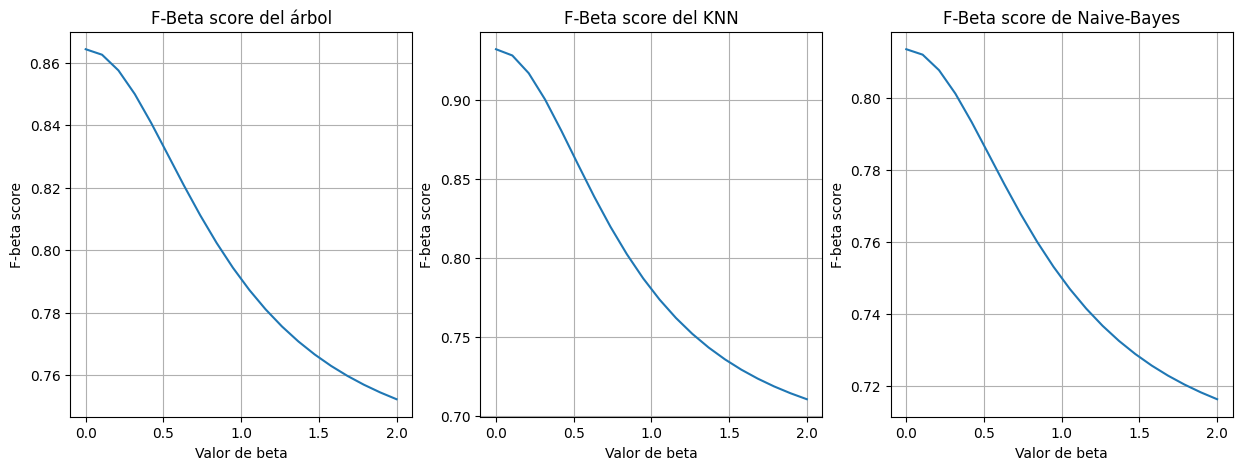

In [ ]:
# Valores de beta
betas = np.linspace(0, 2, 20)


plt.figure(figsize=(15, 5))
#primera grafica
plt.subplot(1, 3, 1)

#Matriz de confusión
mc = confusion_matrix(y_test, y_pred_tree)

# Precisión y recall
precision = mc[0][0]/(mc[0][0] + mc[0][1])
recall = mc[0][0]/(mc[0][0] + mc[1][0])

# Calcular el F-beta score para cada valor de beta
f_beta_scores = [(1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall) for beta in betas]

# Graficar el F-beta score en función de beta
plt.plot(betas, f_beta_scores)
plt.xlabel('Valor de beta')
plt.ylabel('F-beta score')
plt.title(f'F-Beta score del árbol')
plt.grid(True)


#segunda grafica
plt.subplot(1, 3, 2)

#Matriz de confusión
mc = confusion_matrix(y_test, y_pred_knn)

# Precisión y recall
precision = mc[0][0]/(mc[0][0] + mc[0][1])
recall = mc[0][0]/(mc[0][0] + mc[1][0])

# Calcular el F-beta score para cada valor de beta
f_beta_scores = [(1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall) for beta in betas]

# Graficar el F-beta score en función de beta
plt.plot(betas, f_beta_scores)
plt.xlabel('Valor de beta')
plt.ylabel('F-beta score')
plt.title(f'F-Beta score del KNN')
plt.grid(True)


#tercera grafica
plt.subplot(1, 3, 3)

#Matriz de confusión
mc = confusion_matrix(y_test, y_pred_naive)

# Precisión y recall
precision = mc[0][0]/(mc[0][0] + mc[0][1])
recall = mc[0][0]/(mc[0][0] + mc[1][0])

# Calcular el F-beta score para cada valor de beta
f_beta_scores = [(1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall) for beta in betas]

# Graficar el F-beta score en función de beta
plt.plot(betas, f_beta_scores)
plt.xlabel('Valor de beta')
plt.ylabel('F-beta score')
plt.title(f'F-Beta score de Naive-Bayes')
plt.grid(True)

plt.show()

cambio de algoritmo en knn no hace cambios

a todos los modelos les cuesta detectar el 1, puesto que la base tiene muchos mas 0 que 1

Finalmente, vemos que las mejores métricas para analizar este problema son la precisión y el recall, dado que nos dejan ver que el modelo tiene problemas para clasificar los casos positivos, cualesquiera que sea el modelo usado. El mejor modelo en este caso, que es el árbol, sigue teniendo problemas con la detección de casos positivos porque su recall es de 0.44 y su precisión de 0.65. Esto se relaciona con el AUC-ROC, puesto que esto nos dice la capacidad del modelo de diferenciar las clases, dando un área de 0.69.

## **Conclusiones**

El mejor modelo para este problema es el árbol de clasificación, dado que sus métricas fueron las que dieron valores más altos. Podemos pensar en que los datos no están tan agrupados porque el KNN depende de ello, y su exactitud fue baja, por tanto este modelo no es el adecuado para el problema. El árbol, por lo contrario, usa criterios que no dependen de la distancia, por lo que su clasificación resulta siendo mejor.

Lo que nos quiere decir la predicción es que hay más gente sin enfermedades coronarias que con ellas en Surafrica, cosa que podemos ver con la siguiente gráfica:

In [ ]:
y_pred_tree

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1])

([<matplotlib.axis.XTick at 0x78c44869cee0>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

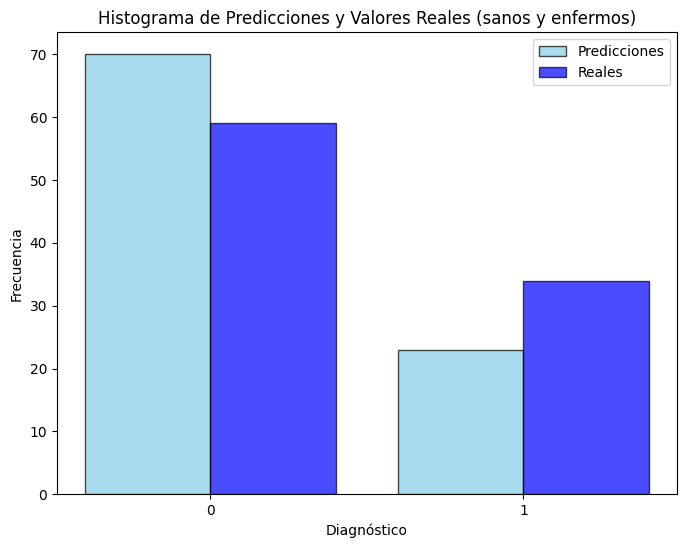

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist([y_pred_tree, y_test], bins=[-0.5, 0.5, 1.5], color=['skyblue', 'blue'], edgecolor='black', alpha=0.7, label=['Predicciones', 'Reales'])
plt.xlabel('Diagnóstico')
plt.ylabel('Frecuencia')
plt.title('Histograma de Predicciones y Valores Reales (sanos y enfermos)')
plt.legend()
plt.xticks([0, 1])